# Import Required Libraries

In [1]:
#for visualizers
#%pip install yellowbrick 

In [2]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn import datasets


from sklearn import tree #Decision tree--eager learner
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.neighbors import KNeighborsClassifier #lazy learner
from sklearn.naive_bayes import GaussianNB #probabilistic
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model #for regression


from sklearn.metrics import confusion_matrix, classification_report #evaluation 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split #training and testing

from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.datasets import fetch_california_housing

import warnings
warnings.filterwarnings("ignore")

# Define utility functions

In [3]:
def graph_confusion_matrix(cmatrix):
    # Print the confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(cmatrix, cmap=plt.cm.Blues)
    for i in range(cmatrix.shape[0]):
        for j in range(cmatrix.shape[1]):
            ax.text(x=j, y=i,s=cmatrix[i, j], va='center', ha='center', size='large')

    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

In [4]:
def plotSilhouette(data,k):
        model=KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
        visualizer.fit(data)
        visualizer.show()

In [5]:
def plotElbow(data,metric):
    model=KMeans()
    #Metrics include:
    #distortion: mean sum of squared distances to centers
    #silhouette: mean ratio of intra-cluster and nearest-cluster distance
    #calinski_harabasz: ratio of within to between cluster dispersion
    visualizer=KElbowVisualizer(model, k=(2,15), metric=metric, timings=False) #timing=False ensures training time is not displayed.
    visualizer.fit(data)
    visualizer.show()

# Load the dataset from file and perform initial preparation.

In [6]:
#Load Iris dataset from datasets
irisData=pd.read_csv("python-data/iris_dataset.csv")

In [7]:
irisData.shape

(150, 5)

In [8]:
irisData.sample(6)

,sepallength,sepalwidth,petallength,petalwidth,class
40,5.0,3.5,1.3,0.3,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor


In [9]:
species=irisData['class']
species.sample(12)

44         Iris-setosa
73     Iris-versicolor
48         Iris-setosa
124     Iris-virginica
143     Iris-virginica
86     Iris-versicolor
9          Iris-setosa
67     Iris-versicolor
5          Iris-setosa
63     Iris-versicolor
140     Iris-virginica
34         Iris-setosa
Name: class, dtype: object

# Encode 'class' attribute

In [10]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
speciesEncodedLabels=LabelEncoder()
species=speciesEncodedLabels.fit_transform(species)
species[:]
irisData['class']=species

In [12]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
irisData['class'].sample(10)

88     1
109    2
127    2
146    2
121    2
63     1
23     0
60     1
67     1
36     0
Name: class, dtype: int32

# Data exploration of Iris Dataset using scatter plots

Text(0, 0.5, 'Sepal width')

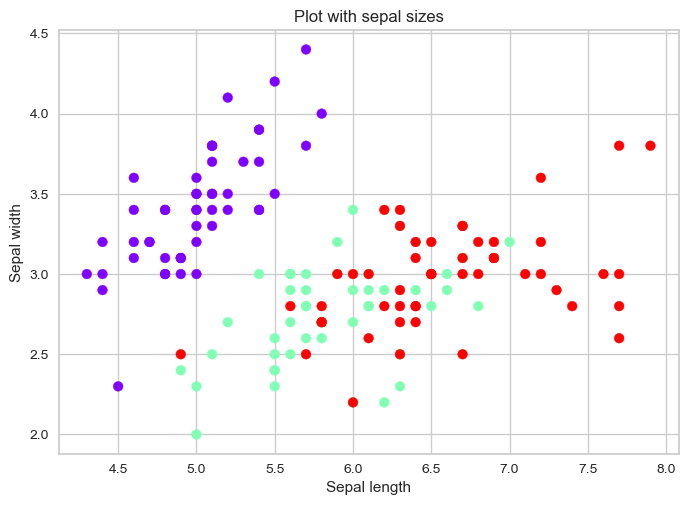

In [14]:
#plt.figure()
plt.scatter(irisData.iloc[:,0], irisData.iloc[:,1],c=species,cmap="rainbow")
#same as: plt.scatter(irisData[sepallength], irisData[sepalwidth],c=species,cmap="rainbow")
plt.title("Plot with sepal sizes")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'petal width')

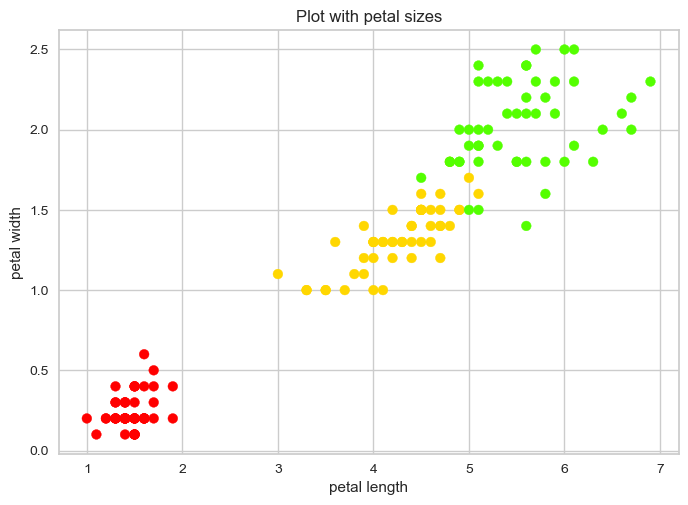

In [15]:
#Further exploration
plt.scatter(irisData.iloc[:,2], irisData.iloc[:,3],c=species,cmap="prism")
plt.title("Plot with petal sizes")
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0, 0.5, 'petal length')

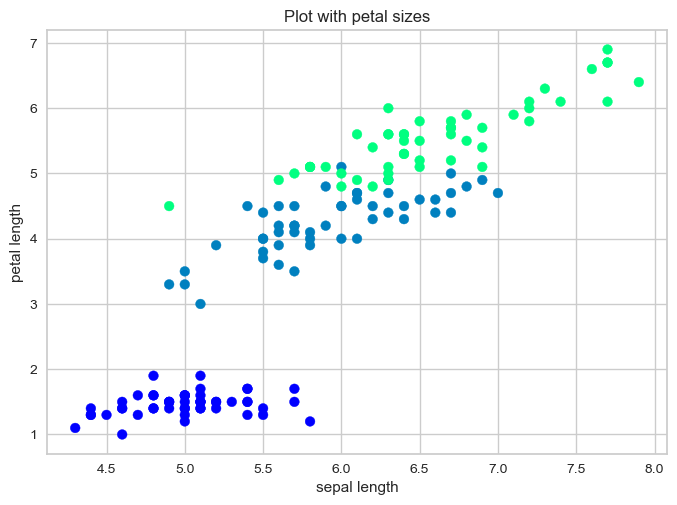

In [16]:
#Further exploration
plt.scatter(irisData.iloc[:,0], irisData.iloc[:,2],c=species,cmap="winter")
plt.title("Plot with petal sizes")
plt.xlabel('sepal length')
plt.ylabel('petal length')

Text(0, 0.5, 'petal width')

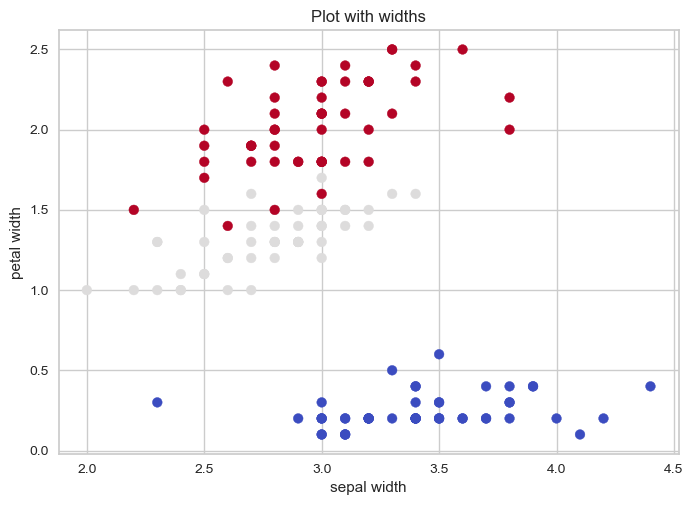

In [17]:
#Further exploration
plt.scatter(irisData.iloc[:,1], irisData.iloc[:,3],c=species,cmap="coolwarm")
plt.title("Plot with widths")
plt.xlabel('sepal width')
plt.ylabel('petal width')

In [18]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Retrieve independent variables(X) and dependent variables(y). Use them to create training and test data

In [19]:
X=irisData.iloc[:,:-1]#all attributes except the last one
y=species
X.shape, y.shape

((150, 4), (150,))

# Perform standard scaling- feature engineering

In [20]:
scaler=StandardScaler() #scales data to unit variance
X=scaler.fit_transform(X) #computes mean and stdev and then uses this to transorm data
X[:4,:]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [21]:
X.shape, y.shape

((150, 4), (150,))

# Generate training and test sets

In [22]:
#Split the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)


In [23]:
X_train.shape

(105, 4)

In [24]:
y_train.shape

(105,)

In [25]:
X_test.shape

(45, 4)

In [26]:
y_test.shape

(45,)

# Build the models and evaluate them. kNN, Decision Tree, and Random Forest selected.

|--- petallength <= -0.74
|   |--- class: 0
|--- petallength >  -0.74
|   |--- petalwidth <= 0.46
|   |   |--- petallength <= 0.68
|   |   |   |--- class: 1
|   |   |--- petallength >  0.68
|   |   |   |--- class: 2
|   |--- petalwidth >  0.46
|   |   |--- petalwidth <= 0.66
|   |   |   |--- sepallength <= 0.92
|   |   |   |   |--- class: 1
|   |   |   |--- sepallength >  0.92
|   |   |   |   |--- class: 2
|   |   |--- petalwidth >  0.66
|   |   |   |--- petallength <= 0.62
|   |   |   |   |--- sepallength <= 0.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepallength >  0.25
|   |   |   |   |   |--- class: 2
|   |   |   |--- petallength >  0.62
|   |   |   |   |--- class: 2



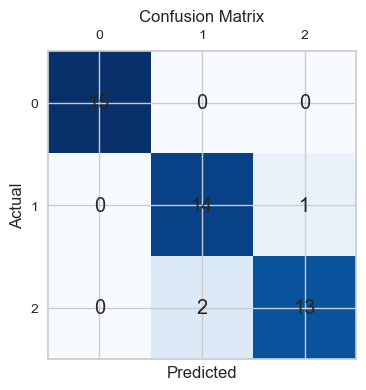

Classification Report:

Precision:0.935
Recall:0.933
f1-score:0.933


In [27]:
#Build a tree model 

#Decision tree classifier---with scaled data
treeClassifier=tree.DecisionTreeClassifier()
treeClassifier.fit(X_train,y_train)#train the model
tree_prediction=treeClassifier.predict(X_test)

# Display the text representation of the tree using export_text function
features=list(irisData.columns[:-1])
text_representation = tree.export_text(treeClassifier,feature_names=features)
print(text_representation)


#Metrics
tree_cmatrix=confusion_matrix(y_test,tree_prediction)
graph_confusion_matrix(tree_cmatrix)

print("Classification Report:")
tree_c_report=classification_report(y_test,tree_prediction,output_dict=True)
#print(tree_c_report)
tree_precision=tree_c_report['weighted avg']['precision']
tree_recall=tree_c_report['weighted avg']['recall']
tree_f1score=tree_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{tree_precision:.3f}\nRecall:{tree_recall:.3f}\
\nf1-score:{tree_f1score:.3f}")

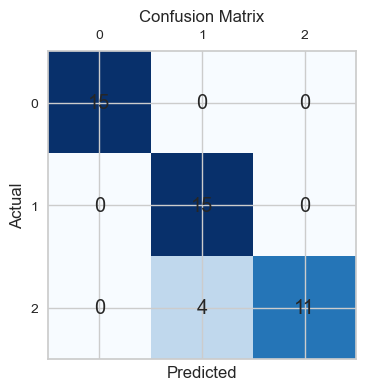

Classification Report:

Precision:0.930
Recall:0.911
f1-score:0.910


In [28]:
#Build a KNN model (k=3)---using scaled data
k3nnClassifier=KNeighborsClassifier(n_neighbors=3)
k3nnClassifier.fit(X_train,y_train)
k3nn_prediction=k3nnClassifier.predict(X_test)
#Metrics
cmatrix=confusion_matrix(y_test,k3nn_prediction)
graph_confusion_matrix(cmatrix)

print("Classification Report:")
c_report=classification_report(y_test,k3nn_prediction,output_dict=True)
#print(c_report)
knn_precision=c_report['weighted avg']['precision']
knn_recall=c_report['weighted avg']['recall']
knn_f1score=c_report['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision:.3f}\nRecall:{knn_recall:.3f}\
\nf1-score:{knn_f1score:.3f}")


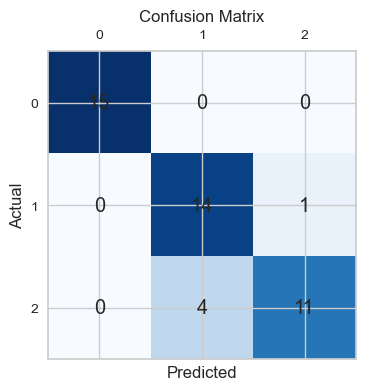

Classification Report:

Precision:0.898
Recall:0.889
f1-score:0.888


In [29]:
scaler#Build Random Forest model---with scaled data
rfClassifier=RandomForestClassifier(n_estimators=33)
rfClassifier.fit(X_train,y_train)
rf_prediction=rfClassifier.predict(X_test)

#Metrics
rf_cscalermatrix=confusion_matrix(y_test,rf_prediction)
graph_confusion_matrix(rf_cmatrix)

print("Classification Report:")
rf_c_report=classification_report(y_test,rf_prediction,output_dict=True)
#print(rf_c_report)
rf_precision=rf_c_report['weighted avg']['precision']
rf_recall=rf_c_report['weighted avg']['recall']
rf_f1score=rf_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision:.3f}\nRecall:{rf_recall:.3f}\
\nf1-score:{rf_f1score:.3f}")



# Retrieve precision, recall, and F1-score values and graph them.

In [30]:
#Retrieve precision, recall, and f1-score
precisions={"knn":knn_precision, "rf":rf_precision, "tree":tree_precision}
recalls={"knn":knn_recall, "rf":rf_recall, "tree":tree_recall}
f1_scores={"knn":knn_f1score, "rf":rf_f1score, "tree":tree_f1score}

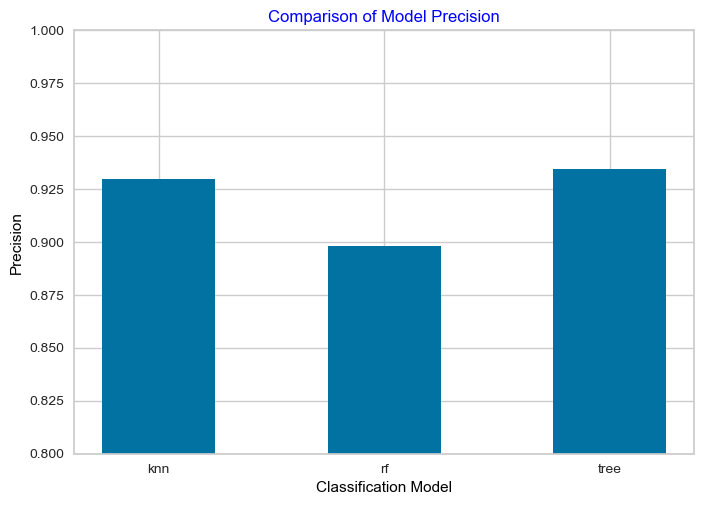

In [128]:
# Plot the graph of precision
models=list(precisions.keys())
modelPrecisions=list(precisions.values())
plt.bar(models, modelPrecisions, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precision", color='blue')
plt.ylim(0.8,1)
plt.show()

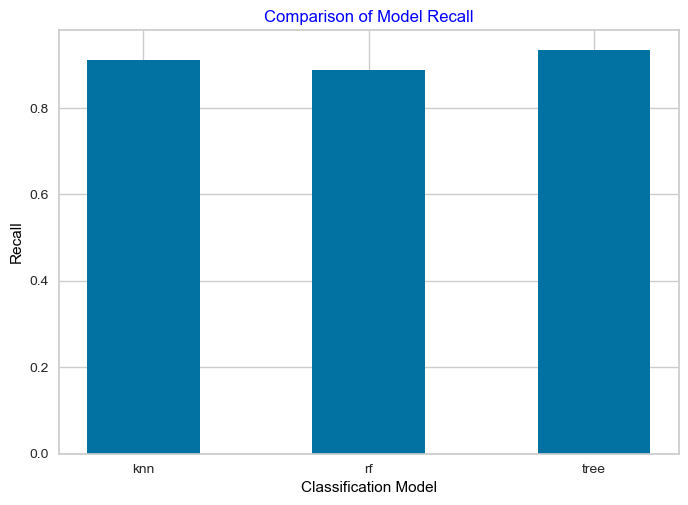

In [129]:
# Plot the graph of recall
models=list(recalls.keys())
modelRecalls=list(recalls.values())
plt.bar(models, modelRecalls, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Recall", color='black')
plt.title("Comparison of Model Recall", color='blue')
plt.show()


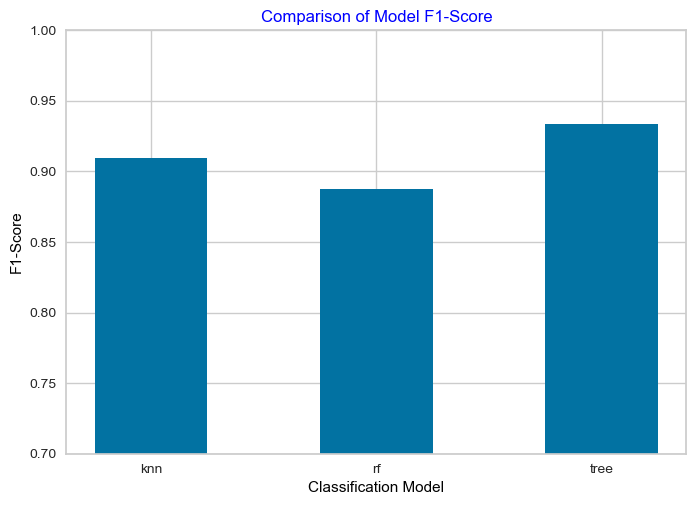

<Figure size 800x550 with 0 Axes>

In [130]:
# Plot the graph of recall
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Comparison of Model F1-Score", color='blue')
plt.ylim(0.7,1)
plt.show()
plt.tight_layout()

# PCA Decomposition of Iris Dataset

In [34]:
irisPCA=PCA(n_components=3)
iris_reduced=irisPCA.fit_transform(X) #use the scaled data
#iris_reduced=irisPCA.fit_transform(irisData.iloc[:,:-1]) #all attributes except class
iris_reduced[:4]

array([[-2.26454173,  0.5057039 , -0.12194335],
       [-2.0864255 , -0.65540473, -0.22725083],
       [-2.36795045, -0.31847731,  0.05147962],
       [-2.30419716, -0.57536771,  0.09886044]])

In [35]:
iris_reduced.shape

(150, 3)

In [36]:
#Take data back to original state
A=irisPCA.inverse_transform(iris_reduced)
A.shape

(150, 4)

In [37]:
np.min(iris_reduced[:,0]),np.max(iris_reduced[:,0])

(-2.774169793705156, 3.309141182676078)

In [38]:
np.min(iris_reduced[:,1]), np.max(iris_reduced[:,1])

(-2.6580626779617593, 2.7223710765744675)

In [39]:
np.min(iris_reduced[:,2]), np.max(iris_reduced[:,2])

(-0.8609268420176825, 1.0041105249947537)

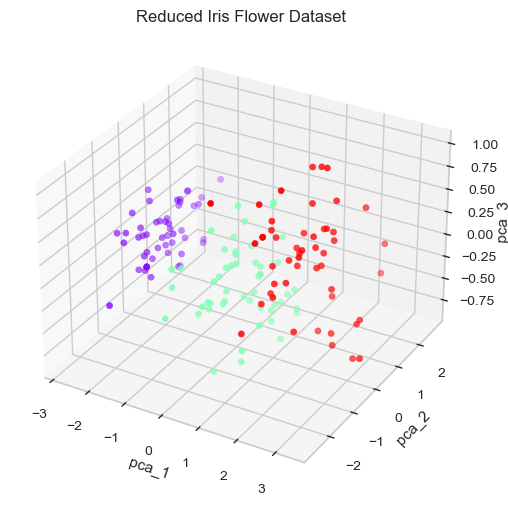

In [125]:
#Plot a 3D graph with the three components.

#Create 3D scatter plot
fig=plt.figure(figsize=(6,6))
ax=plt.axes(projection='3d')
#plot with reduced features
ax.set_title('Reduced Iris Flower Dataset')
ax.scatter3D(iris_reduced[:,0], iris_reduced[:,1], \
           iris_reduced[:,2], c=species,cmap='rainbow')
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
plt.savefig('saved-graphs/pcad.png')
plt.show()

In [41]:
iris_reduced[:5,0] #first five

array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749])

In [42]:
iris_reduced[:5,1] #first five

array([ 0.5057039 , -0.65540473, -0.31847731, -0.57536771,  0.6747674 ])

In [43]:
iris_reduced[:5,2] #first five

array([-0.12194335, -0.22725083,  0.05147962,  0.09886044,  0.02142785])

In [44]:
reduced_X=iris_reduced
reduced_X_train,reduced_X_test, reduced_y_train,reduced_y_test=\
train_test_split(reduced_X,y,test_size=0.3,random_state=42, stratify=y)

# Buidling new models with data of reduced dimensions

|--- pca-1 <= -1.14
|   |--- class: 0
|--- pca-1 >  -1.14
|   |--- pca-1 <= 1.25
|   |   |--- pca-3 <= 0.41
|   |   |   |--- pca-1 <= 1.14
|   |   |   |   |--- class: 1
|   |   |   |--- pca-1 >  1.14
|   |   |   |   |--- pca-1 <= 1.19
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- pca-1 >  1.19
|   |   |   |   |   |--- class: 1
|   |   |--- pca-3 >  0.41
|   |   |   |--- pca-1 <= 0.85
|   |   |   |   |--- class: 1
|   |   |   |--- pca-1 >  0.85
|   |   |   |   |--- class: 2
|   |--- pca-1 >  1.25
|   |   |--- pca-1 <= 1.29
|   |   |   |--- pca-1 <= 1.25
|   |   |   |   |--- class: 2
|   |   |   |--- pca-1 >  1.25
|   |   |   |   |--- class: 1
|   |   |--- pca-1 >  1.29
|   |   |   |--- class: 2



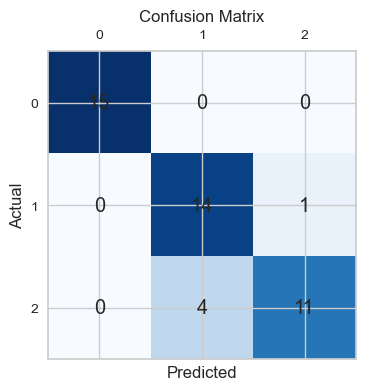

Classification Report:

Precision:0.898
Recall:0.889
f1-score:0.888


In [45]:
#a) Build a tree model 
#train with decomposed data

#Decision tree classifier
treeClassifier2=tree.DecisionTreeClassifier()
treeClassifier2.fit(reduced_X_train,reduced_y_train)#train the model
tree_prediction_PCA=treeClassifier2.predict(reduced_X_test)

# Display the text representation of the tree using export_text function
features=['pca-1','pca-2','pca-3']
text_representation = tree.export_text(treeClassifier2,feature_names=features)
print(text_representation)


#Metrics
tree_cmatrix=confusion_matrix(reduced_y_test,tree_prediction_PCA)
graph_confusion_matrix(tree_cmatrix)

print("Classification Report:")
tree_c_report=classification_report(reduced_y_test,tree_prediction_PCA,output_dict=True)
#print(tree_c_report)
tree_precision_PCA=tree_c_report['weighted avg']['precision']
tree_recall_PCA=tree_c_report['weighted avg']['recall']
tree_f1score_PCA=tree_c_report['weighted avg']['f1-score']
print()
print(f"Precision:{tree_precision_PCA:.3f}\nRecall:{tree_recall_PCA:.3f}\
\nf1-score:{tree_f1score_PCA:.3f}")

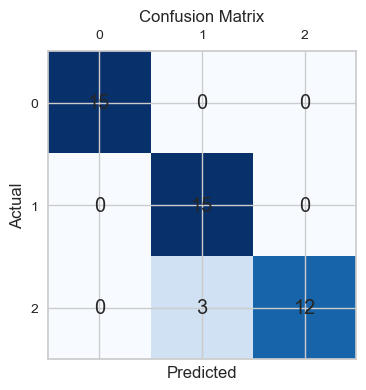

Classification Report:

Precision:0.944
Recall:0.933
f1-score:0.933


In [46]:
#b) Build a KNN model (k=3)
#train with decomposed data
k3nnClassifier2=KNeighborsClassifier(n_neighbors=3)
k3nnClassifier2.fit(reduced_X_train,reduced_y_train)
k3nn_prediction_PCA=k3nnClassifier2.predict(reduced_X_test)
#Metrics
cmatrix_PCA=confusion_matrix(y_test,k3nn_prediction_PCA)
graph_confusion_matrix(cmatrix_PCA)

print("Classification Report:")
c_report_PCA=classification_report(y_test,k3nn_prediction_PCA,output_dict=True)
#print(c_report)
knn_precision_PCA=c_report_PCA['weighted avg']['precision']
knn_recall_PCA=c_report_PCA['weighted avg']['recall']
knn_f1score_PCA=c_report_PCA['weighted avg']['f1-score']
print()
print(f"Precision:{knn_precision_PCA:.3f}\nRecall:{knn_recall_PCA:.3f}\
\nf1-score:{knn_f1score_PCA:.3f}")


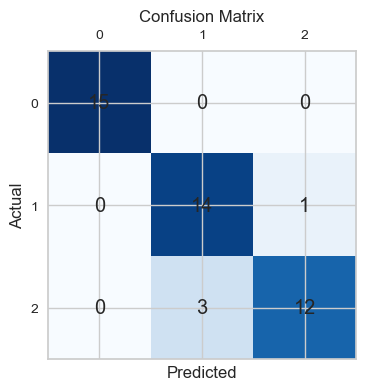

Classification Report:

Precision:0.916
Recall:0.911
f1-score:0.911


In [47]:
#Build Random Forest model
rfClassifier2=RandomForestClassifier(n_estimators=33)
rfClassifier2.fit(reduced_X_train,reduced_y_train)
rf_prediction_PCA=rfClassifier2.predict(reduced_X_test)

#Metrics
cmatrix_PCA=confusion_matrix(y_test,rf_prediction_PCA)
graph_confusion_matrix(cmatrix_PCA)

print("Classification Report:")
c_report_PCA=classification_report(reduced_y_test,rf_prediction_PCA,output_dict=True)
#print(c_report)
rf_precision_PCA=c_report_PCA['weighted avg']['precision']
rf_recall_PCA=c_report_PCA['weighted avg']['recall']
rf_f1score_PCA=c_report_PCA['weighted avg']['f1-score']
print()
print(f"Precision:{rf_precision_PCA:.3f}\nRecall:{rf_recall_PCA:.3f}\
\nf1-score:{rf_f1score_PCA:.3f}")

In [48]:
#Retrieving the encoded classes

In [49]:
speciesEncodedLabels.classes_ #??????

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
tree_prediction_PCA[:10]

array([2, 1, 1, 1, 1, 2, 1, 1, 0, 2])

In [51]:
k3nn_prediction_PCA[:10]

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2])

In [52]:
rf_prediction_PCA[:10]

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2])

In [53]:
#Retrieve the categorical value from the encoded data--output in human friendly format
speciesEncodedLabels.inverse_transform(k3nn_prediction_PCA[:10])#??????

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

# Predict unseen instance and display the result in human friendly format.

In [54]:
#Set up unseen instance--picked these values from the dataset. You can check the correct classifications.
X_unseen=[[5.1,3.5,1.4,0.2],[5,3.3,1.4,0.2],[6.8,3,5.5,2.1],[6.3,2.3,4.4,1.3],[5.6,3,4.1,1.3]]
#Transform the unseen instance using the stanrad scaler since the training set was scaled as well.
X_unseen=scaler.transform(X_unseen)
X_unseen=irisPCA.transform(X_unseen)
print(X_unseen)
#Classfiy unseen instance with the 3nn model
y_unseen_by_k3nn=k3nnClassifier2.predict(X_unseen)
y_unseen_by_k3nn #output is not human friendly

[[-2.26454173  0.5057039  -0.12194335]
 [-2.20595417  0.03223785 -0.14659353]
 [ 1.88425185  0.41433276  0.02454855]
 [ 1.03587821 -1.39246648 -0.6854343 ]
 [ 0.0670676  -0.21262073  0.29412826]]


array([0, 0, 2, 1, 1])

In [55]:
#Display prediction(s) in human friendly format.
print("Instance:{}\nPredicted:{}".format(X_unseen[:],\
    speciesEncodedLabels.inverse_transform(y_unseen_by_k3nn)[:]))

Instance:[[-2.26454173  0.5057039  -0.12194335]
 [-2.20595417  0.03223785 -0.14659353]
 [ 1.88425185  0.41433276  0.02454855]
 [ 1.03587821 -1.39246648 -0.6854343 ]
 [ 0.0670676  -0.21262073  0.29412826]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [56]:
#Classify unseen instance with the Random Forest model
y_unseen_by_tree=treeClassifier2.predict(X_unseen)
print("Instance:{}\nPredicted:{}".format(X_unseen[:], \
                            speciesEncodedLabels.inverse_transform(y_unseen_by_tree)[:]))

Instance:[[-2.26454173  0.5057039  -0.12194335]
 [-2.20595417  0.03223785 -0.14659353]
 [ 1.88425185  0.41433276  0.02454855]
 [ 1.03587821 -1.39246648 -0.6854343 ]
 [ 0.0670676  -0.21262073  0.29412826]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [57]:
#Classfiy unseen instance with the kNN model
y_unseen_by_k3nn=k3nnClassifier2.predict(X_unseen)
print("Instance:{}\nPredicted:{}".format(X_unseen[:], speciesEncodedLabels.inverse_transform(y_unseen_by_k3nn)[:]))

Instance:[[-2.26454173  0.5057039  -0.12194335]
 [-2.20595417  0.03223785 -0.14659353]
 [ 1.88425185  0.41433276  0.02454855]
 [ 1.03587821 -1.39246648 -0.6854343 ]
 [ 0.0670676  -0.21262073  0.29412826]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [58]:
#Classify unseen instance with the Random Forest model
y_unseen_by_rf=rfClassifier2.predict(X_unseen)
print("Instance:{}\nPredicted:{}".format(X_unseen[:], \
                            speciesEncodedLabels.inverse_transform(y_unseen_by_rf)[:]))

Instance:[[-2.26454173  0.5057039  -0.12194335]
 [-2.20595417  0.03223785 -0.14659353]
 [ 1.88425185  0.41433276  0.02454855]
 [ 1.03587821 -1.39246648 -0.6854343 ]
 [ 0.0670676  -0.21262073  0.29412826]]
Predicted:['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


# Regressions models--California dataset

In [59]:
california = fetch_california_housing()
california.data.shape

(20640, 8)

In [60]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
california_target=california.target
california_target[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [62]:
californiaDF=pd.DataFrame(data=california.data,columns=california.feature_names)
californiaDF.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13555,1.7750,44.0,4.299270,0.948905,504.0,3.678832,34.10,-117.30
6333,6.8492,25.0,8.143939,1.045455,451.0,3.416667,33.99,-117.95
19870,2.9844,11.0,5.700885,1.092035,1351.0,2.391150,36.33,-119.36
18325,10.3942,39.0,8.089286,0.973214,353.0,3.151786,37.46,-122.15


In [63]:
californiaDF['MedHouseVal']=california_target
californiaDF.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19969,1.8828,38.0,4.752500,1.132500,1613.0,4.032500,36.21,-119.09,0.446
1451,6.1168,27.0,5.712838,0.976351,807.0,2.726351,37.97,-121.97,2.105
2553,2.5536,37.0,4.687097,0.945161,867.0,2.796774,40.78,-124.18,0.702
13145,1.6458,52.0,4.292453,1.000000,429.0,2.023585,38.26,-121.51,0.528


In [64]:
californiaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [65]:
#Prepare training data for Boston dataset

In [66]:
california_X=californiaDF.iloc[:,:-1]
california_X.shape, california_X.iloc[0,:]

((20640, 8),
 MedInc          8.325200
 HouseAge       41.000000
 AveRooms        6.984127
 AveBedrms       1.023810
 Population    322.000000
 AveOccup        2.555556
 Latitude       37.880000
 Longitude    -122.230000
 Name: 0, dtype: float64)

In [67]:
california_y=californiaDF.iloc[:,-1]
california_y.shape, california_y[0]

((20640,), 4.526)

In [68]:
#Set up linear regression model
linearReg=linear_model.LinearRegression()


In [69]:
X_train, X_test,y_train,y_test=train_test_split(california_X,california_y,test_size=0.25, random_state=42)

In [70]:
y_train.shape,y_test.shape

((15480,), (5160,))

In [71]:
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

In [72]:
#fit the model
linearReg=linearReg.fit(X_train,y_train)

In [73]:
linearreg_predictions=linearReg.predict(X_test)
print("MSE:{:.3f} ".format(mean_squared_error(y_test, linearreg_predictions)))
print("R^2:{:.3f} ".format(r2_score(y_test, linearreg_predictions)))
print("RMSE:{:.3f} ".format(math.sqrt(mean_squared_error(y_test, linearreg_predictions))))

MSE:0.541 
R^2:0.591 
RMSE:0.736 


In [74]:
#Check performance---using the variance. The closer the variance is to 1, the better
variance=linearReg.score(X_test,y_test)
print(f'{variance:.3f}')

0.591


In [75]:
#Set up support vector regression ()
#UNCOMMENT to see results
#svc=svm.SVR(kernel='linear',C=1000)
#svc.fit(X_train,y_train)
#linearSVC_predictions=svc.predict(X_test)
#print("MSE: ",mean_squared_error(y_test, linearSVC_predictions))
#print("R^2: ",r2_score(y_test, linearSVC_predictions))
#print("RMSE: ",math.sqrt(mean_squared_error(y_test, linearSVC_predictions)))

In [76]:
#Set up support vector regression ()
#svc=svm.SVR(kernel='poly',C=1000)
#svc.fit(X_train,y_train)
#polySVC_predictions=svc.predict(X_test)

#print("MSE:{:.3f} ".format(mean_squared_error(y_test, polySVC_predictions)))
#print("R^2:{:.3f} ".format(r2_score(y_test, polySVC_predictions)))
#print("RMSE:{:.3f} ".format(math.sqrt(mean_squared_error(y_test, polySVC_predictions))))

In [77]:
#Set up support vector regression ()
svc=svm.SVR(kernel='rbf',C=1000)
svc.fit(X_train,y_train)
rbfSVC_predictions=svc.predict(X_test)

print("MSE:{:.3f} ".format(mean_squared_error(y_test, rbfSVC_predictions)))
print("R^2:{:.3f} ".format(r2_score(y_test, rbfSVC_predictions)))
print("RMSE:{:.3f} ".format(math.sqrt(mean_squared_error(y_test, rbfSVC_predictions))))

MSE:0.560 
R^2:0.577 
RMSE:0.748 


# Clustering Models- Iris Dataset with 'class' attribute dropped.

In [78]:
irisData.shape

(150, 5)

In [79]:
scaler2=StandardScaler()
df_iris_standardized=scaler2.fit_transform(irisData.iloc[:,:-1])
df_iris_standardized=pd.DataFrame(df_iris_standardized, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris_standardized=df_iris_standardized.set_index(irisData.index)

In [80]:
df_iris_standardized.iloc[:2,:]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


In [81]:
df_iris_standardized.sample(6)

,sepal_length,sepal_width,petal_length,petal_width
39,-0.900681,0.800654,-1.284407,-1.312977
54,0.795669,-0.587764,0.478430,0.396172
107,1.765012,-0.356361,1.445147,0.790591
146,0.553333,-1.281972,0.705893,0.922064
42,-1.748856,0.337848,-1.398138,-1.312977
103,0.553333,-0.356361,1.047087,0.790591


In [112]:
#Perform clustering using k-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(df_iris_standardized)
df_iris_standardized["clusters"] = cluster_labels #and assign cluster labels

<Axes: xlabel='pc_1', ylabel='pc_2'>

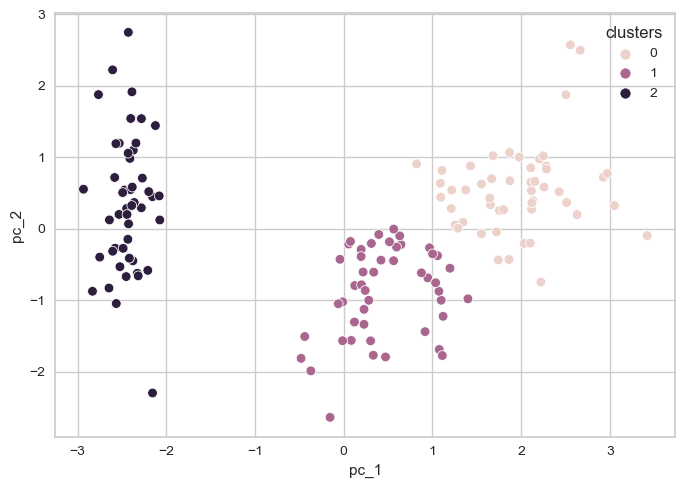

In [113]:
# using PCA to reduce the dimensionality---for purposes of 2D visualization
pca = PCA(n_components=2, whiten=False, random_state=42)
iris_standardized_pca = pca.fit_transform(df_iris_standardized)
iris_standardized_pca = pd.DataFrame(data=iris_standardized_pca, columns=["pc_1", "pc_2"])
iris_standardized_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=iris_standardized_pca)

In [114]:
# Calculate silhouette_score
print("{:.1f}".format(silhouette_score(iris_standardized_pca, kmeans.labels_)))

0.6


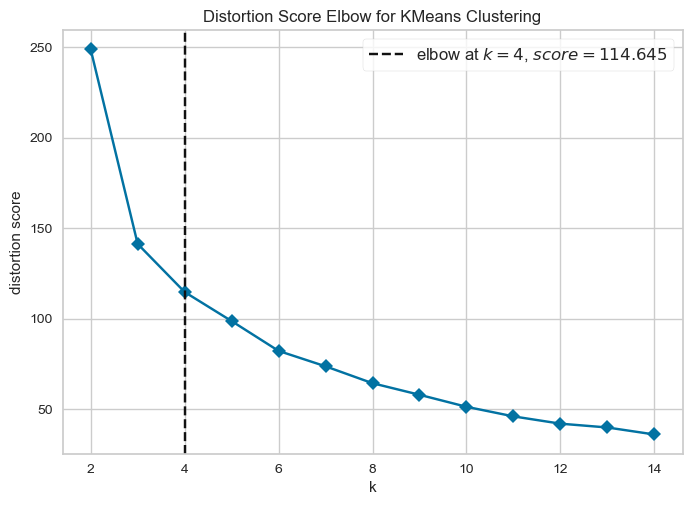

In [115]:
#metric='silhouette'
#metric='calinski_harabasz'
metric='distortion'
plotElbow(df_iris_standardized,metric)

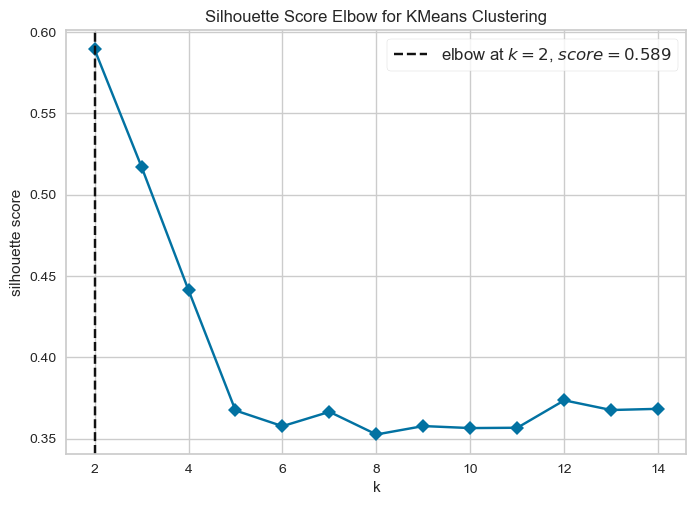

In [116]:
metric='silhouette'
#metric='calinski_harabasz'
#metric='distortion'
plotElbow(df_iris_standardized,metric)

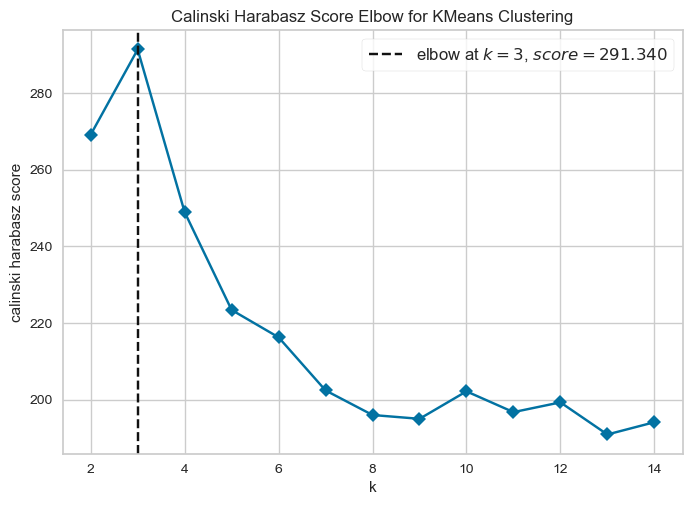

In [117]:
#metric='silhouette'
metric='calinski_harabasz'
#metric='distortion'
plotElbow(df_iris_standardized,metric)

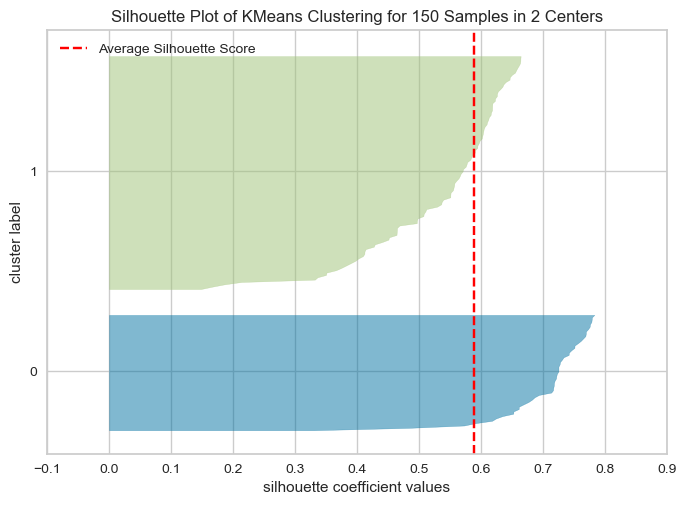

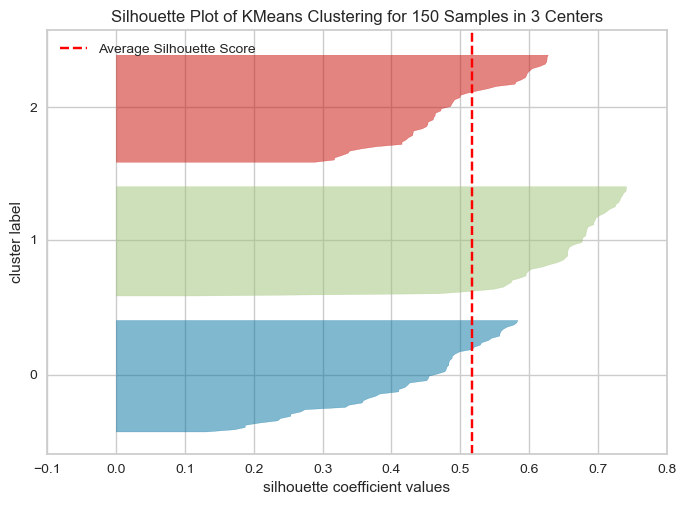

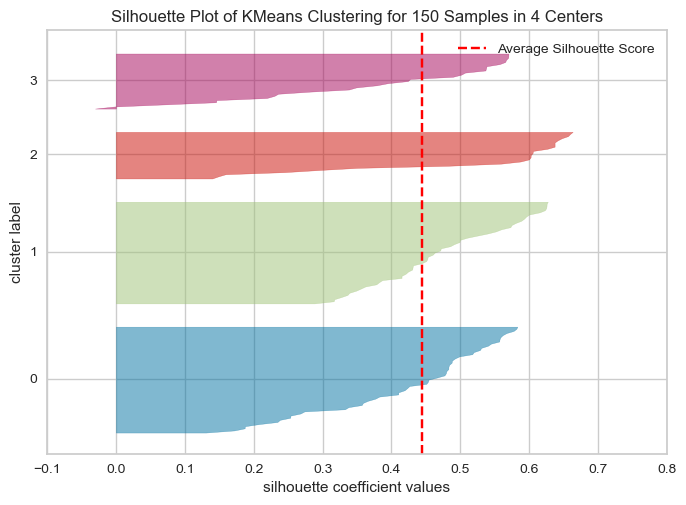

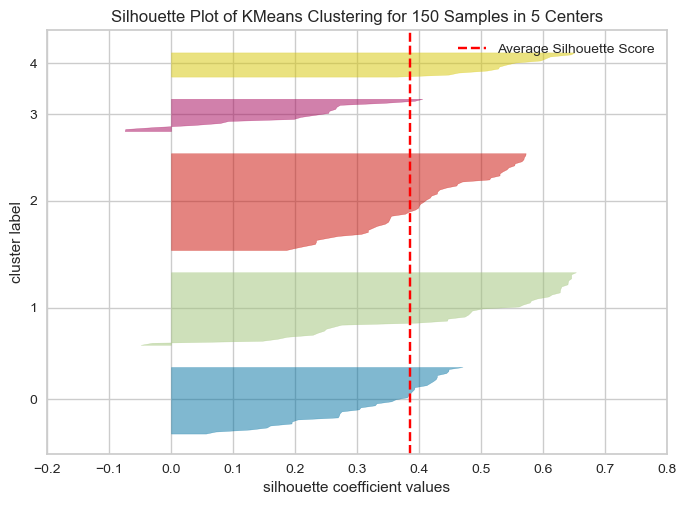

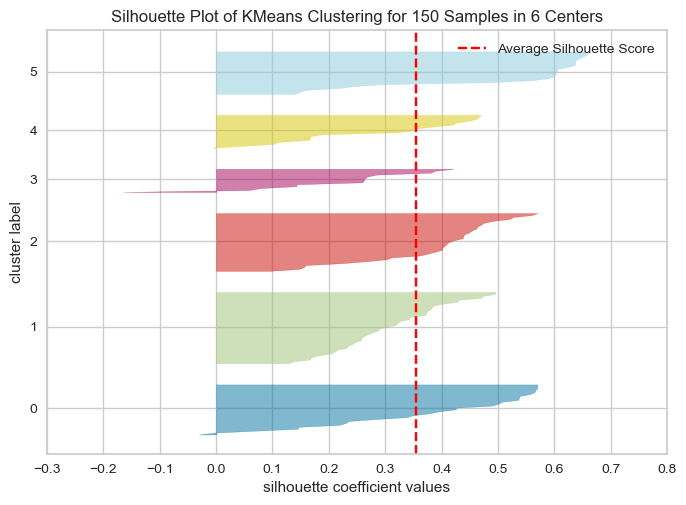

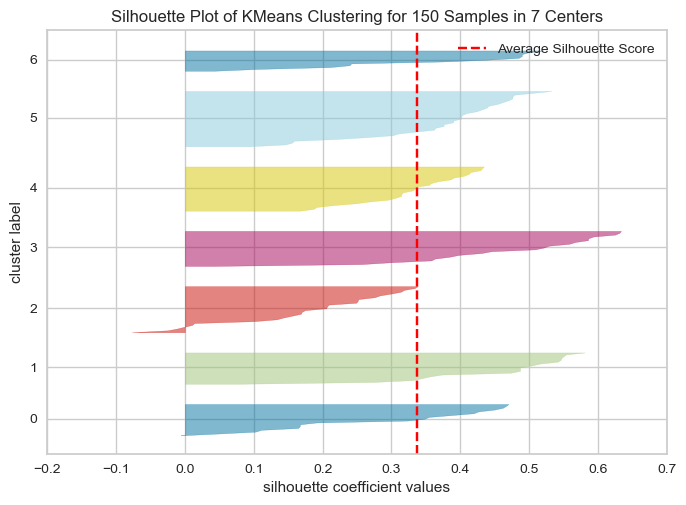

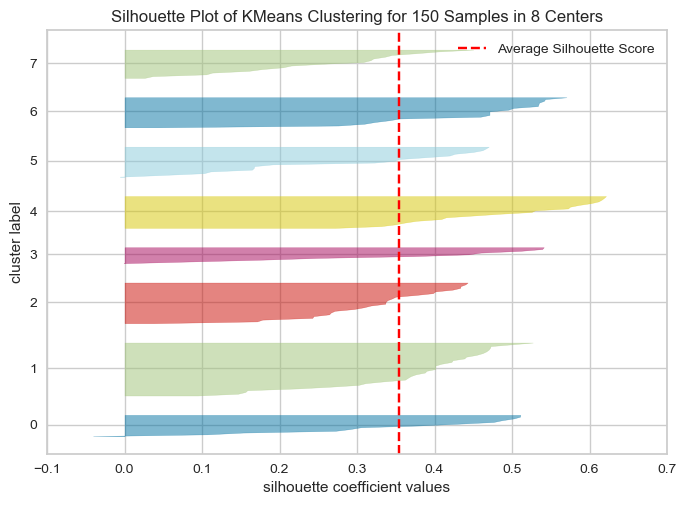

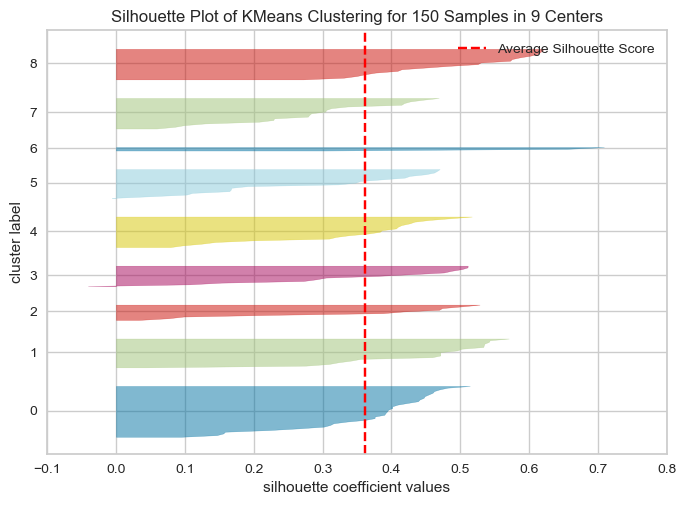

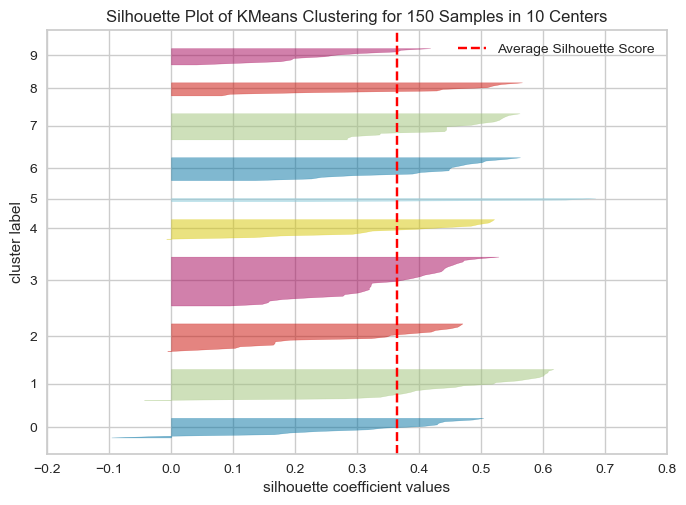

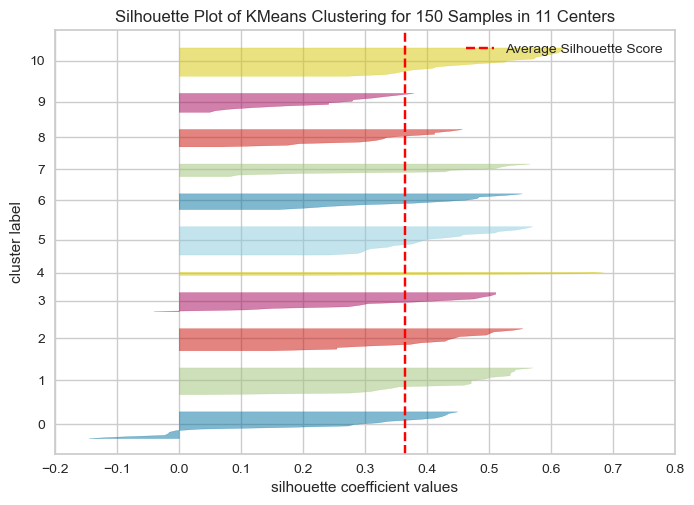

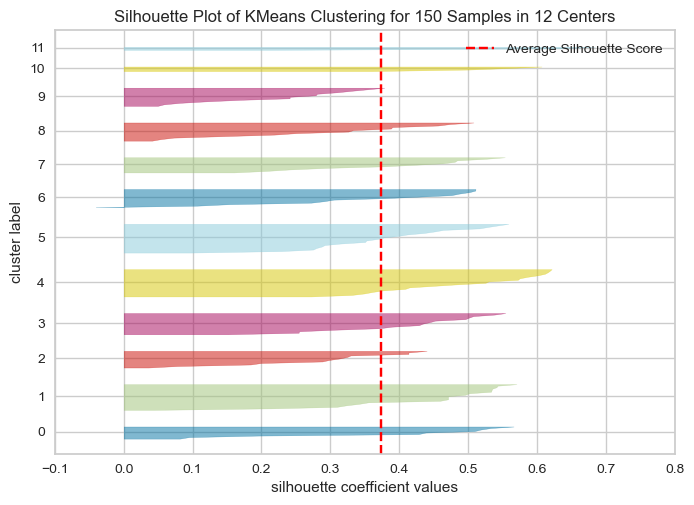

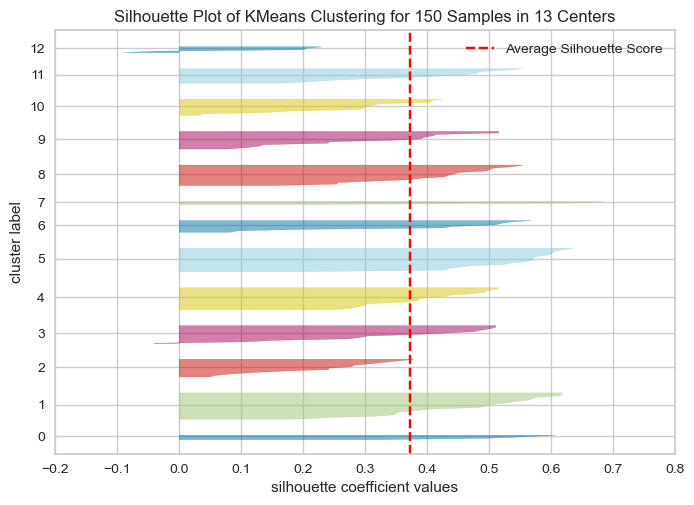

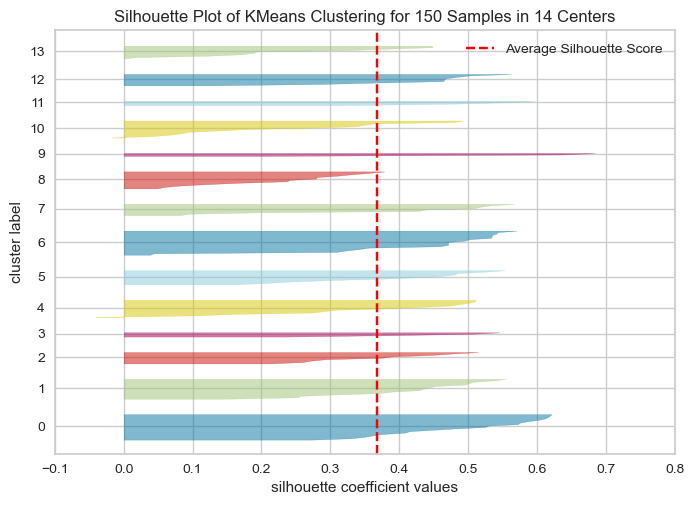

In [118]:
for k in range(2,15):
    plotSilhouette(df_iris_standardized,k)

In [119]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [120]:
kmeans.cluster_centers_

array([[ 1.06889068e+00,  6.56095466e-02,  9.69036197e-01,
         1.00197871e+00, -4.44089210e-16],
       [-7.72342140e-02, -9.27784215e-01,  3.22919830e-01,
         2.37867695e-01,  3.00000000e+00],
       [-1.01457897e+00,  8.42306793e-01, -1.30487835e+00,
        -1.25512862e+00,  1.48000000e+00]])

In [121]:
len(kmeans.cluster_centers_)

3

In [122]:
len(kmeans.labels_)

150

In [123]:
kmeans.inertia_

153.7008872836681

In [124]:
kmeans.n_iter_

3